In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data = {'sex': {'male' : 0 , 'female' : 1} , 'smoker': {'no': 0 , 'yes' : 1}, 'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}}
df_1 = df.copy()
df_1.replace(data, inplace=True)

In [5]:
df_1.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


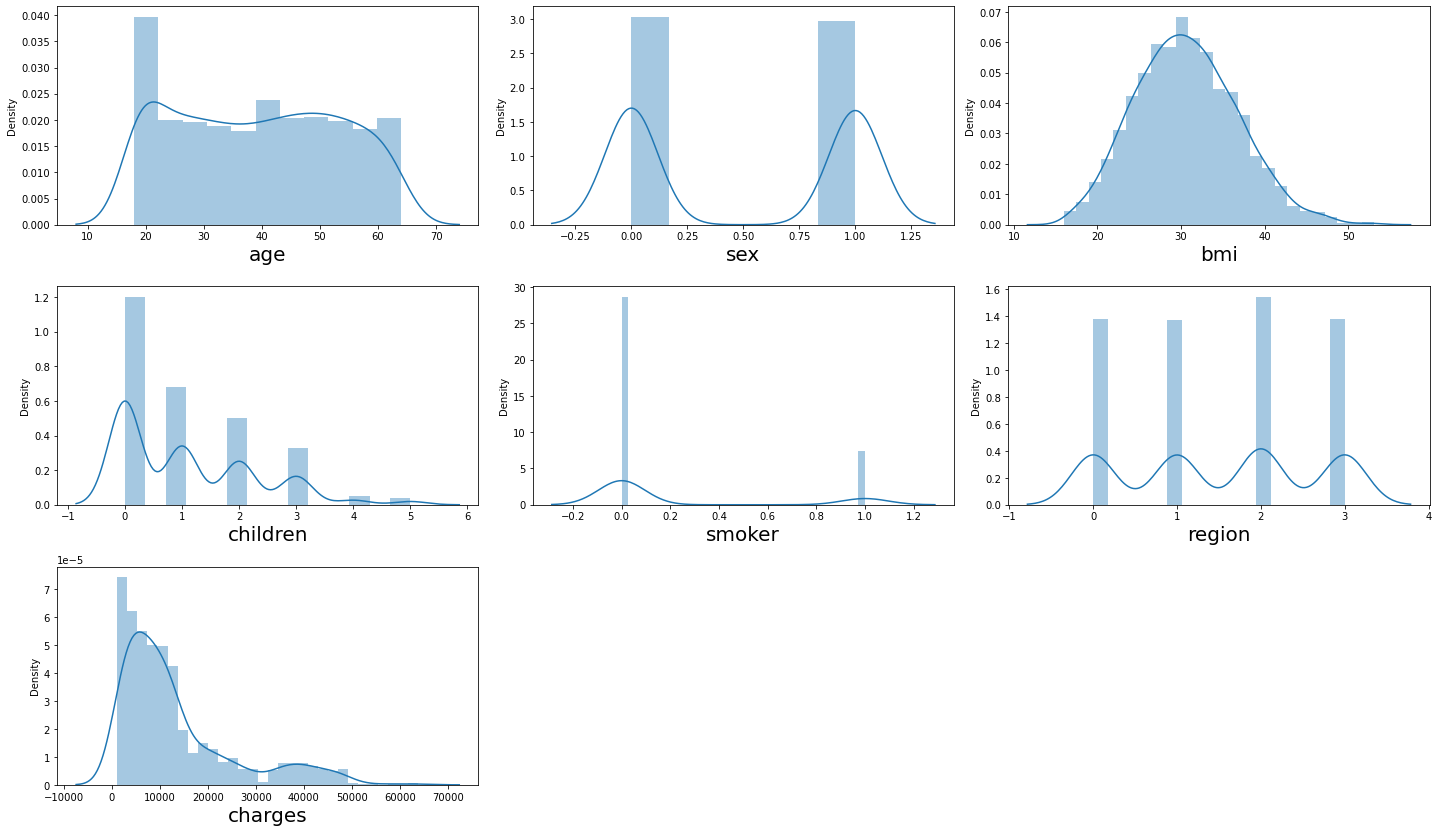

In [6]:
# Data dustribution for each column
plt.figure(figsize=(20,15), facecolor='white')
plotnumber=1
for column in df_1:
    if plotnumber<=7:
        ax= plt.subplot(4,3,plotnumber)
        sns.distplot(df_1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [7]:
# Diveide the dataset into features and labels
y=df_1['charges']
x=df_1.drop(columns=['charges'])

In [8]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [9]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,0
4,32,0,28.880,0,0,0
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0
1334,18,1,31.920,0,0,1
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,3


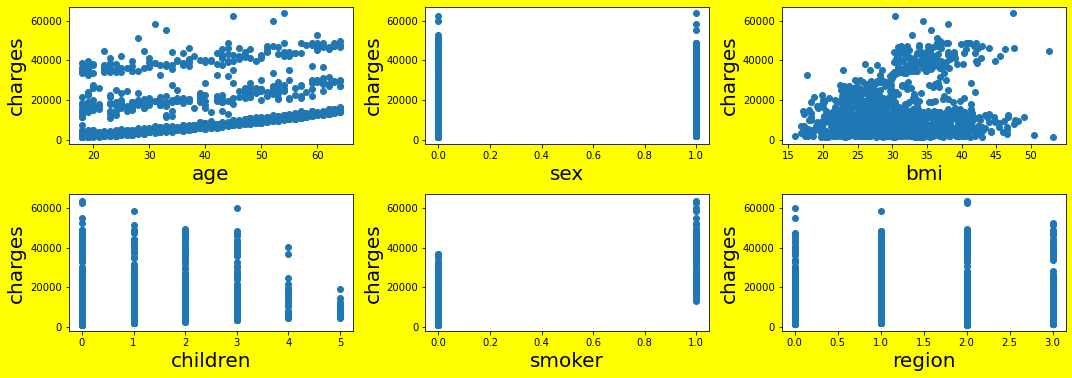

In [10]:
#Visualkizing relationship
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=7:
        ax= plt.subplot (4,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('charges', fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [11]:
#Data Scaling, Formula: z=(x-mean)/std
scaler= StandardScaler()
x_scaler=scaler.fit_transform(x)
x_scaler

array([[-1.43876426,  1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34374564],
       [-1.50996545, -0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.4388983 ],
       [-0.79795355, -0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.4388983 ],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.4388983 ],
       [-1.29636188,  1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34374564],
       [ 1.55168573,  1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -1.37079638]])

In [12]:
# Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=348)
y_train.head()

1290    7133.90250
1182    2632.99200
1238    6985.50695
802     2103.08000
864     8782.46900
Name: charges, dtype: float64

In [13]:
# Model installing and running
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [14]:
# Prediction
df_1.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,3,16884.9240
1,18,0,33.77,1,0,2,1725.5523


In [15]:
print('Charges is :', regression.predict(scaler.transform([[18, 0, 33.77, 1, 0, 2]])))

Charges is : [3084.86676129]


In [16]:
#Adjusted R2 score
regression.score(x_train, y_train)

0.7529413516055036

In [17]:
regression.score(x_test, y_test)

0.7354674704245835

In [18]:
x_test[1]

array([-1.43876426,  1.0105187 , -0.38770221, -0.90861367,  1.97058663,
        1.34374564])

In [19]:
y_pred=regression.predict(x_test)
y_pred

array([ 1.00782722e+04,  2.48500977e+04,  3.71425278e+04,  2.69184924e+04,
        1.26453492e+04,  9.61646204e+03,  2.65562520e+04,  6.11301391e+03,
        2.79849797e+04,  1.14863133e+04,  1.43737094e+04,  3.98328425e+03,
        7.31966320e+03, -1.15302212e+03,  6.15932732e+03,  2.66672870e+04,
        7.77567873e+03,  2.83328891e+04,  3.02781231e+04,  1.18338789e+04,
        4.79910301e+03, -6.74221438e+02,  1.34615695e+04,  2.77705344e+03,
        1.34858898e+04,  4.98803294e+03,  1.09075563e+04,  1.49350063e+03,
        5.33635987e+03,  4.12754245e+03,  2.43435087e+03,  7.43563915e+03,
        5.77054722e+03,  1.59735541e+04,  1.03957419e+04,  3.68105116e+04,
        1.28145151e+04,  6.49818783e+03, -1.54104830e+03,  1.29846701e+04,
        4.80340322e+03,  3.44802450e+04,  6.68909067e+03,  1.19323033e+04,
        7.40895923e+03,  3.19523964e+04,  4.96669508e+03,  1.67421455e+04,
        1.15294895e+04,  3.08415395e+04,  1.29790530e+04,  1.09553850e+04,
        2.59984672e+04,  

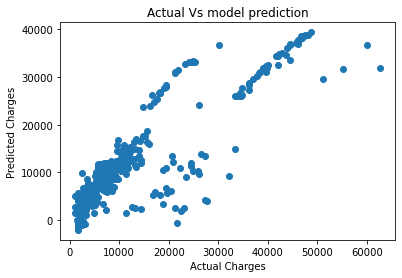

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Vs model prediction')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
 mean_absolute_error(y_test, y_pred)

4630.473634046536

In [23]:
mean_squared_error(y_test, y_pred)

46851484.82776078

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

6844.814448015431

In [25]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV 

In [26]:
lassocv=LassoCV(alphas=None, max_iter=10)
lassocv.fit(x_train, y_train)

LassoCV(max_iter=10)

In [27]:
alpha=lassocv.alpha_
alpha

9.087135693251618

In [28]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=9.087135693251618)

In [29]:
lasso_reg.score(x_test, y_test)

0.7354550822029637

In [30]:
np.arange(0.001, 0.1, 0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [31]:
ridgecv=RidgeCV(alphas=np.arange(0.001, 0.1, 0.01))
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [32]:
ridgecv.alpha_ 

0.09099999999999998

In [33]:
ridge_model= Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.09099999999999998)

In [34]:
ridge_model.score(x_test, y_test)

0.7354588737064285